In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset/enade7.csv", sep = ';',decimal=',')
df.shape

(4415128, 27)

In [3]:
# Apaga NaN values
df.dropna(inplace=True)
df.shape

(4413756, 27)

## **Data Visualization**

----
### Grupos

In [4]:
dfv1 = df[['NU_ANO', 'NM_GRUPO','NT_GER','NT_FG','NT_CE']].groupby(['NU_ANO', 'NM_GRUPO']).mean()

In [ ]:
# 2004
dfv1.loc[2004]

In [ ]:
# 2005
dfv1.loc[2005]

In [ ]:
# 2006
dfv1.loc[2006]

In [ ]:
# 2007
dfv1.loc[2007]

In [ ]:
# 2008
dfv1.loc[2008]

In [ ]:
# 2009
dfv1.loc[2009]

In [ ]:
# 2010
dfv1.loc[2010]

In [ ]:
# 2011
dfv1.loc[2011]

In [ ]:
# 2012
dfv1.loc[2012]

In [ ]:
# 2013
dfv1.loc[2013]

In [ ]:
# 2014
dfv1.loc[2014]

In [ ]:
# 2015
dfv1.loc[2015]

In [ ]:
# 2016
dfv1.loc[2016]

In [ ]:
# 2017
dfv1.loc[2017]

-------
### Participações no Exame

* **Ciclo Avaliativo Triênial**
* Ciclo 1 (ou ano I): Saúde, Ciências agrárias e áreas afins
* Ciclo 2 (ou ano II): Licenciaturas, Ciências Exatas e áreas afins
* Ciclo 3 (ou ano III): Ciências Sociais Aplicadas, Ciências Humanas e áreas afins 

** Fonte: http://download.inep.gov.br/educacao_superior/enade/documentos/2018/PressKit_Enade_2018.pdf

In [4]:
dfp = df.groupby(['NU_ANO', 'NM_INSCRICAO', 'CICLO']).size().reset_index(name='COUNT')
dfp

,NU_ANO,NM_INSCRICAO,CICLO,COUNT
0,2004,Concluinte,Ciclo 1,51303
1,2004,Ingressante,Ciclo 1,74170
2,2005,Concluinte,Ciclo 2,136865
3,2005,Ingressante,Ciclo 2,154754
4,2006,Concluinte,Ciclo 3,150622
5,2006,Ingressante,Ciclo 3,179662
6,2007,Concluinte,Ciclo 1,64702
7,2007,Ingressante,Ciclo 1,105532
8,2008,Concluinte,Ciclo 2,185556
9,2008,Ingressante,Ciclo 2,206470


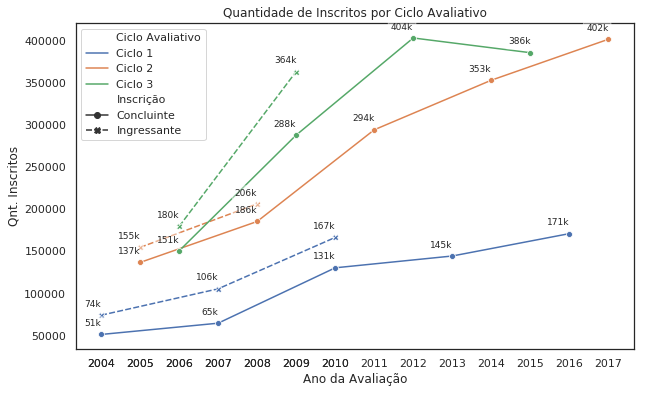

In [5]:
sns.set(style="white")
fig = plt.figure(figsize=(10, 6))

# Nomes mudados para a legenda
dfp['Ciclo Avaliativo'] = dfp['CICLO'] 
dfp['Inscrição'] = dfp['NM_INSCRICAO']

ax = sns.lineplot(x="NU_ANO", y="COUNT", hue="Ciclo Avaliativo", style="Inscrição", 
                  data=dfp, markers=True)
ax.set_title('Quantidade de Inscritos por Ciclo Avaliativo')
ax.set_xlabel('Ano da Avaliação')
ax.set_ylabel('Qnt. Inscritos')

# Exibir todos os anos no eixo x
plt.xticks(dfp['NU_ANO']) 

# Números indicados nos marcadores
for i,j in zip(dfp['NU_ANO'], dfp['COUNT']):
    ax.annotate(str(round(j/1000))+"k",xy=(i,j), ha='right', fontsize=9,
                xytext=(i, j+10000), bbox=dict(boxstyle='round', fc='w', alpha=0.4))
      
plt.savefig('Qnt Inscritos.png', dpi=800)


---------
### Notas: Ciclo Avaliativo

* NT_GER: Nota Geral
* NT_CE: Nota Conhecimento Específico
* NT_FG: Nota Fundamentos Gerais

In [6]:
dfc1 = df[df['CICLO'] == 'Ciclo 1']
dfc2 = df[df['CICLO'] == 'Ciclo 2']
dfc3 = df[df['CICLO'] == 'Ciclo 3']

dfc1 = dfc1[dfc1['NM_INSCRICAO'] == 'Concluinte']
dfc2 = dfc2[dfc2['NM_INSCRICAO'] == 'Concluinte']
dfc3 = dfc3[dfc3['NM_INSCRICAO'] == 'Concluinte']

dfc1 = dfc1.groupby(['NU_ANO', 'NM_INSCRICAO']).agg('mean').reset_index()
dfc2 = dfc2.groupby(['NU_ANO', 'NM_INSCRICAO']).agg('mean').reset_index()
dfc3 = dfc3.groupby(['NU_ANO', 'NM_INSCRICAO']).agg('mean').reset_index()

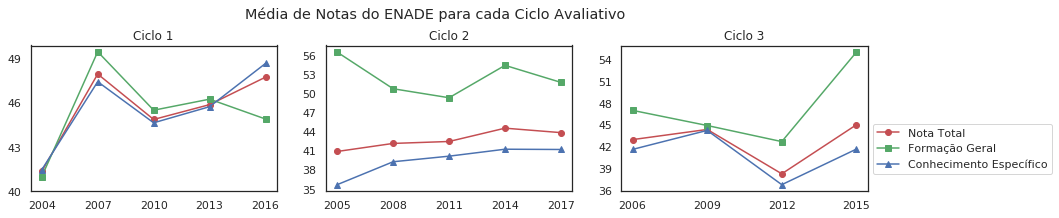

In [7]:
sns.set(style="white")
fig = plt.figure(figsize=(15,3))
fig.suptitle('Média de Notas do ENADE para cada Ciclo Avaliativo')

plt.subplot(131)
# Add set of axes to figure
#axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
# Plot on that set of axes
plt.plot(dfc1['NU_ANO'], dfc1['NT_GER'], 'r-o', label='Nota Global')
plt.plot(dfc1['NU_ANO'], dfc1['NT_FG'], 'g-s', label='Formação Geral')
plt.plot(dfc1['NU_ANO'], dfc1['NT_CE'], 'b-^', label='Componente Específico')
#plt.set_xlabel('Ano da Avaliação')
#plt.set_ylabel('Nota')
plt.title('Ciclo 1')
#axes.legend(loc='best')
plt.xticks(dfc1['NU_ANO']) 
plt.yticks(np.arange(40,51,3)) 

plt.subplot(132)
# Add set of axes to figure
#axes2 = fig.add_axes([0.2, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
# Plot on that set of axes
plt.plot(dfc2['NU_ANO'], dfc2['NT_GER'], 'r-o', label='Nota Global')
plt.plot(dfc2['NU_ANO'], dfc2['NT_FG'], 'g-s', label='Formação Geral')
plt.plot(dfc2['NU_ANO'], dfc2['NT_CE'], 'b-^', label='Componente Específico')
#plt.set_xlabel('Ano da Avaliação')
#plt.set_ylabel('Nota')
plt.title('Ciclo 2')
#axes.legend(loc='best')
plt.xticks(dfc2['NU_ANO']) 
plt.yticks(np.arange(35,58,3)) 

plt.subplot(133)
# Add set of axes to figure
#axes3 = fig.add_axes([0.3, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
# Plot on that set of axes
plt.plot(dfc3['NU_ANO'], dfc3['NT_GER'], 'r-o', label='Nota Global')
plt.plot(dfc3['NU_ANO'], dfc3['NT_FG'], 'g-s', label='Formação Geral')
plt.plot(dfc3['NU_ANO'], dfc3['NT_CE'], 'b-^', label='Componente Específico')
#plt.set_xlabel('Ano da Avaliação')
#plt.set_ylabel('Nota')
plt.title('Ciclo 3')
#axes.legend(loc='best')
plt.xticks(dfc3['NU_ANO']) 
plt.yticks(np.arange(36,57,3)) 

plt.legend(labels=['Nota Total', 'Formação Geral', 'Conhecimento Específico'], loc='best',
          bbox_to_anchor=(1, 0.5))
#fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.show()

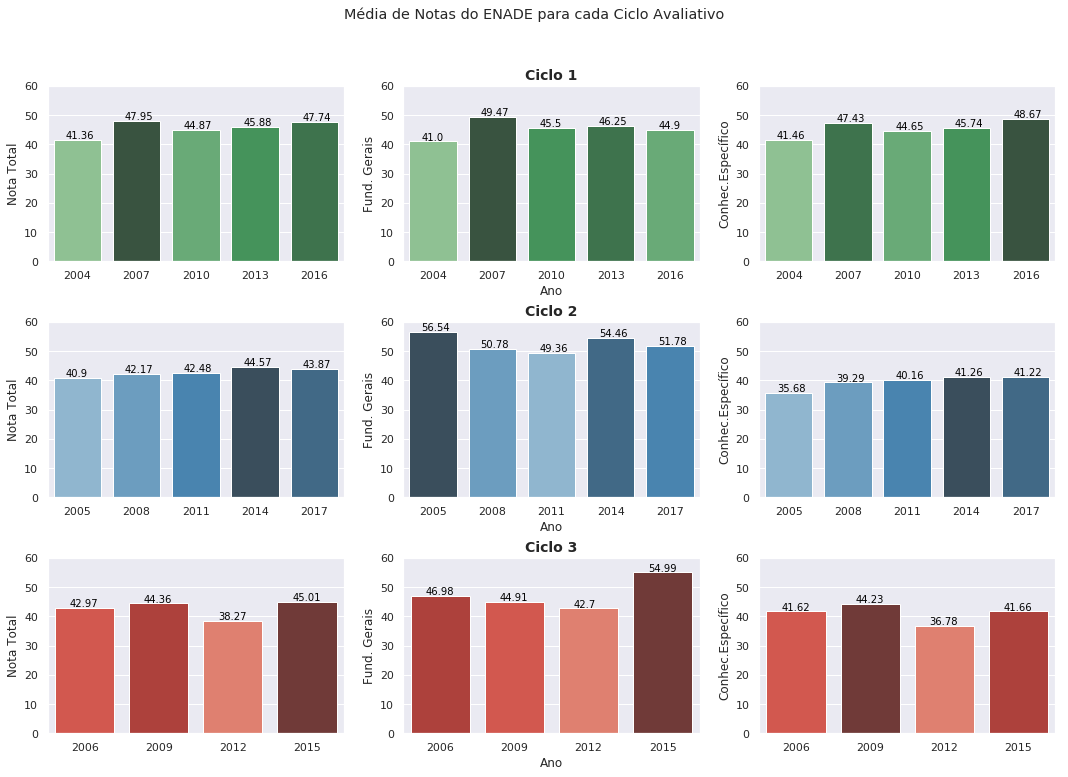

In [8]:
fig = plt.figure(figsize=(15, 11))
fig.suptitle('Média de Notas do ENADE para cada Ciclo Avaliativo')

sns.set()

plt.subplot(331)
pal = sns.color_palette("Greens_d", len(dfc1))
rank = dfc1["NT_GER"].argsort().argsort() 
ax1 = sns.barplot(x="NU_ANO", y="NT_GER", data=dfc1, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(332)
pal = sns.color_palette("Greens_d", len(dfc1))
rank = dfc1["NT_FG"].argsort().argsort() 
ax2 = sns.barplot(x="NU_ANO", y="NT_FG", data=dfc1, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(333)
pal = sns.color_palette("Greens_d", len(dfc1))
rank = dfc1["NT_CE"].argsort().argsort() 
ax3 = sns.barplot(x="NU_ANO", y="NT_CE", data=dfc1, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(334)
pal = sns.color_palette("Blues_d", len(dfc2))
rank = dfc2["NT_GER"].argsort().argsort() 
ax4 = sns.barplot(x="NU_ANO", y="NT_GER", data=dfc2, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(335)
pal = sns.color_palette("Blues_d", len(dfc2))
rank = dfc2["NT_FG"].argsort().argsort() 
ax5 = sns.barplot(x="NU_ANO", y="NT_FG", data=dfc2, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(336)
pal = sns.color_palette("Blues_d", len(dfc2))
rank = dfc2["NT_CE"].argsort().argsort() 
ax6 = sns.barplot(x="NU_ANO", y="NT_CE", data=dfc2, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(337)
pal = sns.color_palette("Reds_d", len(dfc3))
rank = dfc3["NT_GER"].argsort().argsort() 
ax7 = sns.barplot(x="NU_ANO", y="NT_GER", data=dfc3, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(338)
pal = sns.color_palette("Reds_d", len(dfc3))
rank = dfc3["NT_FG"].argsort().argsort() 
ax8 = sns.barplot(x="NU_ANO", y="NT_FG", data=dfc3, errwidth=False, palette=np.array(pal[::-1])[rank])

plt.subplot(339)
pal = sns.color_palette("Reds_d", len(dfc3))
rank = dfc3["NT_CE"].argsort().argsort() 
ax9 = sns.barplot(x="NU_ANO", y="NT_CE", data=dfc3, errwidth=False, palette=np.array(pal[::-1])[rank])

ax2.set_title('Ciclo 1', fontweight="bold", fontsize=14)
ax5.set_title('Ciclo 2', fontweight="bold", fontsize=14)
ax8.set_title('Ciclo 3', fontweight="bold", fontsize=14)

axis = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for ax in axis:
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()+0.5,\
                str(round((i.get_height()), 2)), fontsize=10, color='black')
    
    if ax == ax1 or ax == ax4 or ax == ax7:
        ax.set_ylabel('Nota Total')
        ax.set_xlabel('')
    elif ax == ax2 or ax == ax5 or ax == ax8:
        ax.set_ylabel('Fund. Gerais')
        ax.set_xlabel('Ano')
    else:
        ax.set_ylabel('Conhec.Específico')
        ax.set_xlabel('')
        
    ax.set_ylim([0, 60])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('Notas Ciclos - Anos.png', dpi=800)

In [9]:
dfc = df[df['NM_INSCRICAO'] == 'Concluinte']
dfc = dfc[['CICLO', 'NT_GER', 'NT_FG', 'NT_CE']].groupby(['CICLO']).mean().reset_index()

dfc

,CICLO,NT_GER,NT_FG,NT_CE
0,Ciclo 1,46.039000,45.556054,46.183457
1,Ciclo 2,43.225703,52.290286,40.188066
2,Ciclo 3,42.392274,47.602487,40.655840


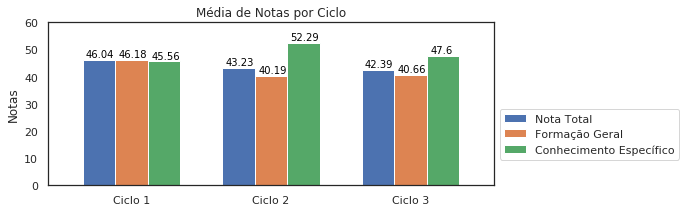

In [10]:
#fig = plt.figure(figsize=(15, 11))
sns.set(style='white')
ax = dfc.plot(x='CICLO', y=['NT_GER', 'NT_CE', 'NT_FG'], kind='bar', 
              legend=False, figsize=(8,3), width=0.7, 
              title='Média de Notas por Ciclo')

lgd = ax.legend(labels=['Nota Total', 'Formação Geral', 'Conhecimento Específico'], loc='best',
          bbox_to_anchor=(1, 0.5))
text = ax.text(-0.3,1, None, transform=ax.transAxes)

ax.set_xticklabels(dfc['CICLO'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Notas')
ax.set_ylim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_x()+0.025, i.get_height()+1,\
            str(round((i.get_height()), 2)), fontsize=10, color='black') 
    
fig = ax.get_figure()
fig.savefig('Notas Ciclos - Total.png', dpi=800, bbox_extra_artists=(lgd, text), bbox_inches='tight')

-----
### Notas: Áreas de Estudo

* Áreas existentes de acordo com o INEP
    * Agricultura e Veterinária
    * Ciências
    * Ciências Sociais
    * Educacão
    * Engenharia
    * Humanidades e Artes
    * Saúde e Bem-Estar
    * Serviços

* Informações oriundas dos microdados Censo do Ensino Superios 
* Fonte: http://portal.inep.gov.br/censo-da-educacao-superior

In [11]:
dfa = df[df['NM_INSCRICAO'] == 'Concluinte']
dfa = dfa.groupby(['NM_AREA']).size().reset_index(name='COUNT')
dfa

,NM_AREA,COUNT
0,Agricultura e Veterinária,69230
1,Ciências,184638
2,Ciências Sociais,1142212
3,Educação,857458
4,Engenharia,352857
5,Humanidades e Artes,56014
6,Saúde e Bem-Estar,433487
7,Serviços,67007


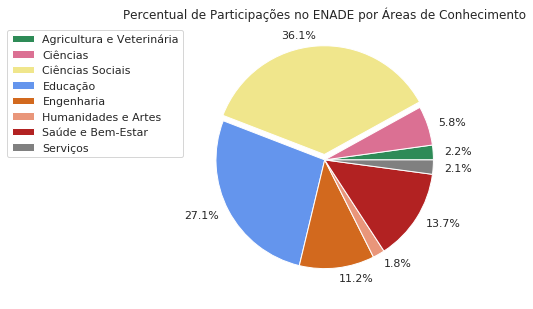

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dfa['COUNT']
labels = dfa['NM_AREA']
perc = data.apply(lambda x: round(x/sum(data)*100, 1)).apply(lambda y: str(y)+"%")

explode = (0, 0, 0.05, 0, 0, 0, 0, 0)
colors=['seagreen', 'palevioletred', 'khaki', 'cornflowerblue', 
        'chocolate', 'darksalmon', 'firebrick', 'gray']

ax.pie(data, explode=explode, colors=colors,
       labels=perc, autopct='', startangle=0)

legend = ax.legend(labels,loc="upper right", bbox_to_anchor=(0, 0.5, 0, 0.5))

text = ax.text(-0.3,0, None, transform=ax.transAxes)

ax.set_title('Percentual de Participações no ENADE por Áreas de Conhecimento')

plt.savefig('Participação Áreas.png', dpi=800, bbox_extra_artists=(legend, text), bbox_inches='tight')

In [13]:
dfa = df[df['NM_INSCRICAO'] == 'Concluinte']
dfa = dfa[['NM_AREA', 'NT_GER', 'NT_FG', 'NT_CE']].groupby(['NM_AREA']).mean().reset_index()
dfa = dfa.sort_values('NT_GER', ascending=False)

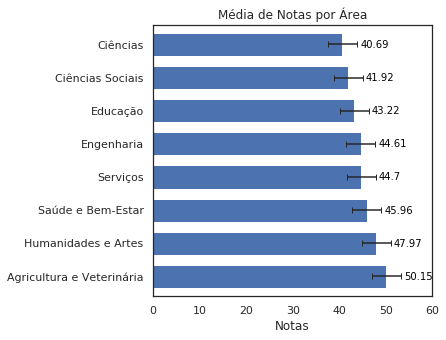

In [14]:
#fig = plt.figure(figsize=(10, 7))

err = dfa['NT_GER'].std()
sns.set(style="white")

ax = dfa.plot(x='NM_AREA', y=['NT_GER'], kind='barh', 
              legend=False, figsize=(5,5), width=0.7, xerr=err, capsize=3,
              title='Média de Notas por Área')

text = ax.text(-0.3,1, None, transform=ax.transAxes)

ax.set_xlabel('Notas')
ax.set_ylabel('')
ax.set_xlim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_width()+3.8, i.get_y()+0.25,\
            str(round((i.get_width()), 2)), fontsize=10, color='black') 
fig = ax.get_figure()
fig.savefig('Médias por Área.png', dpi=800, bbox_inches='tight')

------
### Notas: Faixa Etária

* **Homens**
* **Mulheres**
    * 16-24 anos
    * 25-33 anos
    * 34-42 anos
    * 43-51 anos
    * 52-60 anos
    * 61-69 anos
    * 70-78 anos
    * 79-90 anos

In [15]:
dfi = df
dfi['FAIXA'] = pd.cut(df['NU_IDADE'], bins=[16, 24, 33, 42, 51, 60, 69,  79, 100])
dfi = dfi.groupby(['FAIXA', 'NM_SEXO']).size().reset_index(name='COUNT')

# Deleta "Outro"
dfi = dfi[dfi['NM_SEXO'] != 'Outro']

dfi

,FAIXA,NM_SEXO,COUNT
0,"(16, 24]",Feminino,1344222
1,"(16, 24]",Masculino,863944
3,"(24, 33]",Feminino,812207
4,"(24, 33]",Masculino,608699
6,"(33, 42]",Feminino,315474
7,"(33, 42]",Masculino,194668
9,"(42, 51]",Feminino,131175
10,"(42, 51]",Masculino,75674
12,"(51, 60]",Feminino,35209
13,"(51, 60]",Masculino,21240


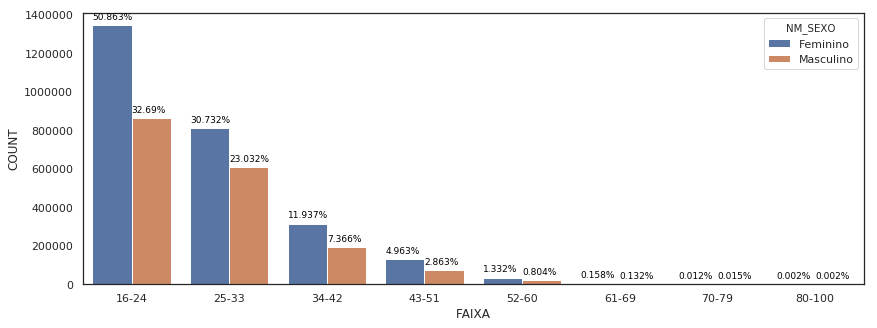

In [16]:
mtotal = dfi[dfi['NM_SEXO'] == 'Masculino']
mtotal = mtotal['COUNT'].sum()
ftotal = dfi[dfi['NM_SEXO'] == 'Feminino']
ftotal = ftotal['COUNT'].sum()

fig = plt.figure(figsize=(14, 5))
ax = sns.barplot(x='FAIXA', y='COUNT', data=dfi, hue='NM_SEXO')

aux = 0
for i in ax.patches:
    if aux % 2:
        ax.text(i.get_x(), i.get_height()+30000,\
                str(round(((i.get_height()/mftotal)*100), 3))+"%", fontsize=9, color='black') 
    else:
        ax.text(i.get_x(), i.get_height()+30000,\
                str(round(((i.get_height()/ftotal)*100), 3))+"%", fontsize=9, color='black')         
plt.xticks(np.arange(8), ('16-24', '25-33', '34-42', '43-51', '52-60', '61-69', '70-79', '80-100'))

plt.show()

# CORRIGIR ESCALA !!!!!

In [17]:
dfi = df[df['NM_INSCRICAO'] == 'Concluinte']
# Deleta "Outro"
dfi = dfi[dfi['NM_SEXO'] != 'Outro']

dfi['FAIXA'] = pd.cut(df['NU_IDADE'], bins=[16, 24, 33, 42, 51, 60, 69,  79, 100])

dfi = dfi[['FAIXA', 'NM_SEXO', 'NT_GER']].groupby(['FAIXA', 'NM_SEXO']).mean().reset_index()

dfi

,FAIXA,NM_SEXO,NT_GER
0,"(16, 24]",Feminino,45.054674
1,"(16, 24]",Masculino,45.315996
2,"(24, 33]",Feminino,42.317581
3,"(24, 33]",Masculino,42.615778
4,"(33, 42]",Feminino,41.500824
5,"(33, 42]",Masculino,42.258865
6,"(42, 51]",Feminino,40.584108
7,"(42, 51]",Masculino,42.450280
8,"(51, 60]",Feminino,39.033864
9,"(51, 60]",Masculino,41.670933


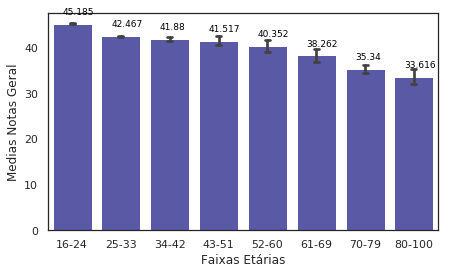

In [18]:
fig = plt.figure(figsize=(7, 4))
ax = sns.barplot(x='FAIXA', y='NT_GER', data=dfi, capsize=0.1, color="blue", saturation=0.3)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+2,\
            str(round(((i.get_height())), 3)), fontsize=9, color='black') 
    
plt.xticks(np.arange(8), ('16-24', '25-33', '34-42', '43-51', '52-60', '61-69', '70-79', '80-100'))
ax.set_xlabel('Faixas Etárias')
ax.set_ylabel('Medias Notas Geral')

plt.show()

------
### Notas: Categoria Administrativa

* Pública Federal
* Pública Estadual
* Pública Municipal
* Privada com Fins Lucrativos
* Privada sem Fins Lucrativos

In [23]:
df['CATEG_ADM'].unique()

array(['Pública Federal', 'Pública Estadual',
       'Privada sem fins lucrativos', 'Privada com fins lucrativos',
       'Pública Municipal'], dtype=object)

In [24]:
dfadm = df[df['NM_INSCRICAO'] == 'Concluinte']

dfadm = dfadm[['CATEG_ADM', 'NT_GER']].groupby('CATEG_ADM').size().reset_index(name='COUNT')

In [25]:
dfadm

,CATEG_ADM,COUNT
0,Privada com fins lucrativos,971519
1,Privada sem fins lucrativos,1357543
2,Pública Estadual,331033
3,Pública Federal,475025
4,Pública Municipal,27783


Text(0.5, 1.0, 'Percentual de Participações no ENADE - Categorias Administrativas')

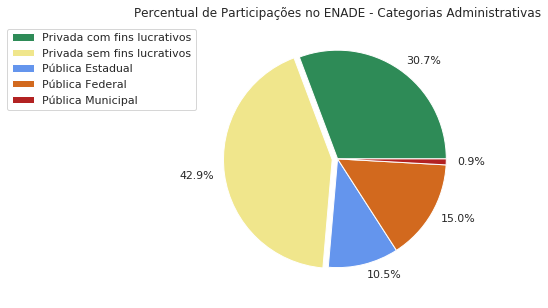

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dfadm['COUNT']
labels = dfadm['CATEG_ADM']
perc = data.apply(lambda x: round(x/sum(data)*100, 1)).apply(lambda y: str(y)+"%")

explode = (0, 0.05, 0, 0, 0)
colors=['seagreen', 'khaki', 'cornflowerblue', 'chocolate', 'firebrick']

ax.pie(data, explode=explode, colors=colors,
       labels=perc, autopct='', startangle=0)

legend = ax.legend(labels,loc="upper right", bbox_to_anchor=(0, 0.5, 0, 0.5))

text = ax.text(-0.3,0, None, transform=ax.transAxes)

ax.set_title('Percentual de Participações no ENADE - Categorias Administrativas')

#plt.savefig('Participação Áreas.png', dpi=800, bbox_extra_artists=(legend, text), bbox_inches='tight')

In [27]:
dfadm = df[df['NM_INSCRICAO'] == 'Concluinte']

dfadm = dfadm[['CATEG_ADM', 'NT_GER']].groupby('CATEG_ADM').mean().reset_index()

dfadm = dfadm.sort_values('NT_GER', ascending=True)

In [28]:
dfadm

,CATEG_ADM,NT_GER
4,Pública Municipal,38.937145
0,Privada com fins lucrativos,41.481284
1,Privada sem fins lucrativos,42.977891
2,Pública Estadual,43.824281
3,Pública Federal,48.509218


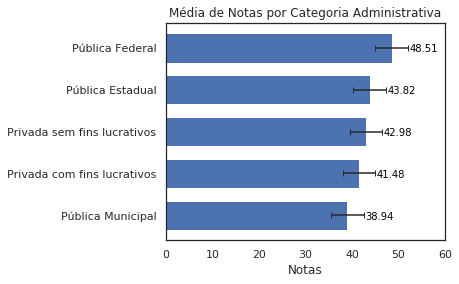

In [30]:
#fig = plt.figure(figsize=(10, 7))

err = dfadm['NT_GER'].std()
sns.set(style="white")

ax = dfadm.plot(x='CATEG_ADM', y=['NT_GER'], kind='barh', 
              legend=False, figsize=(5,4), width=0.7, xerr=err, capsize=3,
              title='Média de Notas por Categoria Administrativa')

text = ax.text(-0.3,1, None, transform=ax.transAxes)

ax.set_xlabel('Notas')
ax.set_ylabel('')
ax.set_xlim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_width()+3.8, i.get_y()+0.25,\
            str(round((i.get_width()), 2)), fontsize=10, color='black') 
fig = ax.get_figure()
fig.savefig('Médias por Categoria Administrativa.png', dpi=800, bbox_inches='tight')

In [31]:
df.columns

Index(['NU_ANO', 'CICLO', 'CO_IES', 'NM_IES', 'CATEG_ADM', 'NM_UF',
       'NM_REGIAO', 'CO_GRUPO', 'NM_GRUPO', 'CO_CURSO', 'CO_AREA', 'NM_AREA',
       'CO_MODALIDADE', 'NM_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO',
       'NM_UF_CURSO', 'NU_IDADE', 'TP_SEXO', 'NM_SEXO', 'TP_INSCRICAO',
       'NM_INSCRICAO', 'TP_PRES', 'NM_PRES', 'NT_GER', 'NT_FG', 'NT_CE',
       'FAIXA'],
      dtype='object')

--------
### Notas: Regiões

* Norte
* Nordeste
* Sul
* Sudeste
* Centro-Oeste

In [39]:
dfreg = df[df['NM_INSCRICAO'] == 'Concluinte']

dfreg = dfreg.groupby('NM_REGIAO').size().reset_index(name='COUNT')

In [40]:
dfreg

,NM_REGIAO,COUNT
0,Centro-Oeste,297031
1,Nordeste,563623
2,Norte,192891
3,Sudeste,1515250
4,Sul,594108


Text(0.5, 1.0, 'Percentual de Participações no ENADE - Grandes Regiões')

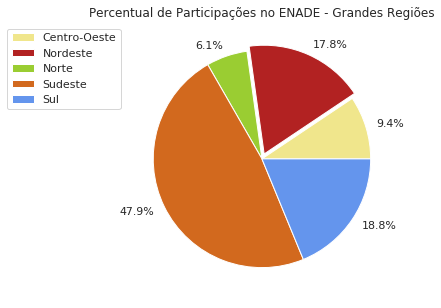

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dfreg['COUNT']
labels = dfreg['NM_REGIAO']
perc = data.apply(lambda x: round(x/sum(data)*100, 1)).apply(lambda y: str(y)+"%")

explode = (0, 0.05, 0, 0, 0)
colors=['khaki', 'firebrick', 'yellowgreen', 'chocolate', 'cornflowerblue']

ax.pie(data, explode=explode, colors=colors,
       labels=perc, autopct='', startangle=0)

legend = ax.legend(labels,loc="upper right", bbox_to_anchor=(0, 0.5, 0, 0.5))

text = ax.text(-0.3,0, None, transform=ax.transAxes)

ax.set_title('Percentual de Participações no ENADE - Grandes Regiões')

#plt.savefig('Participação Áreas.png', dpi=800, bbox_extra_artists=(legend, text), bbox_inches='tight')

In [42]:
dfreg = df[df['NM_INSCRICAO'] == 'Concluinte']

dfreg = dfreg[['NM_REGIAO', 'NT_GER']].groupby('NM_REGIAO').mean().reset_index()

dfreg = dfreg.sort_values('NT_GER', ascending=True)

dfreg

,NM_REGIAO,NT_GER
2,Norte,40.028423
0,Centro-Oeste,41.539639
1,Nordeste,42.913325
3,Sudeste,43.790023
4,Sul,44.902449


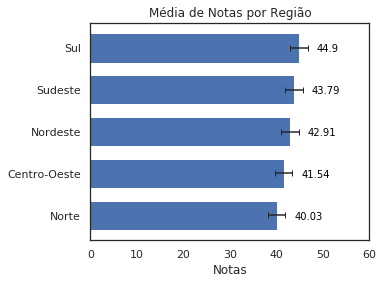

In [43]:
#fig = plt.figure(figsize=(10, 7))

err = dfreg['NT_GER'].std()
sns.set(style="white")

ax = dfreg.plot(x='NM_REGIAO', y=['NT_GER'], kind='barh', 
              legend=False, figsize=(5,4), width=0.7, xerr=err, capsize=3,
              title='Média de Notas por Região')

text = ax.text(-0.3,1, None, transform=ax.transAxes)

ax.set_xlabel('Notas')
ax.set_ylabel('')
ax.set_xlim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_width()+3.8, i.get_y()+0.25,\
            str(round((i.get_width()), 2)), fontsize=10, color='black') 
fig = ax.get_figure()
#fig.savefig('Médias por Categoria Administrativa.png', dpi=800, bbox_inches='tight')

In [44]:
dffed = df[df['NM_INSCRICAO'] == 'Concluinte']

dffed = dffed[dffed['CATEG_ADM'] == "Pública Federal"]

dffed = dffed[['NM_REGIAO', 'NT_GER']].groupby(['NM_REGIAO']).mean().reset_index()

dffed = dffed.sort_values('NT_GER', ascending=True)

dffed

,NM_REGIAO,NT_GER
2,Norte,43.346537
1,Nordeste,47.249821
0,Centro-Oeste,48.281176
3,Sudeste,50.565186
4,Sul,50.766242


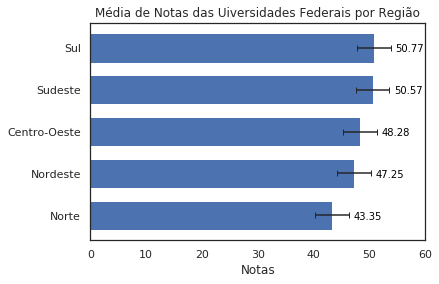

In [45]:
#fig = plt.figure(figsize=(10, 7))

err = dffed['NT_GER'].std()
sns.set(style="white")

ax = dffed.plot(x='NM_REGIAO', y=['NT_GER'], kind='barh', 
              legend=False, figsize=(6,4), width=0.7, xerr=err, capsize=3,
              title='Média de Notas das Uiversidades Federais por Região')

text = ax.text(-0.3,1, None, transform=ax.transAxes)
\
ax.set_xlabel('Notas')
ax.set_ylabel('')
ax.set_xlim([0, 60]) 

for i in ax.patches:
    ax.text(i.get_width()+3.8, i.get_y()+0.25,\
            str(round((i.get_width()), 2)), fontsize=10, color='black') 
fig = ax.get_figure()
#fig.savefig('Médias por Categoria Administrativa.png', dpi=800, bbox_inches='tight')

------
### Melhores Desempenhos no Período Análisado

In [46]:
df.columns

Index(['NU_ANO', 'CICLO', 'CO_IES', 'NM_IES', 'CATEG_ADM', 'NM_UF',
       'NM_REGIAO', 'CO_GRUPO', 'NM_GRUPO', 'CO_CURSO', 'CO_AREA', 'NM_AREA',
       'CO_MODALIDADE', 'NM_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO',
       'NM_UF_CURSO', 'NU_IDADE', 'TP_SEXO', 'NM_SEXO', 'TP_INSCRICAO',
       'NM_INSCRICAO', 'TP_PRES', 'NM_PRES', 'NT_GER', 'NT_FG', 'NT_CE',
       'FAIXA'],
      dtype='object')

In [47]:
dfm = df[df['NU_ANO'] > 2009]

dfm[['NU_ANO', 'NM_MODALIDADE', 'NT_GER']].groupby(['NU_ANO', 'NM_MODALIDADE']).mean().reset_index()

,NU_ANO,NM_MODALIDADE,NT_GER
0,2010,EaD,31.158381
1,2010,Presencial,39.941036
2,2011,EaD,43.504913
3,2011,Presencial,42.186407
4,2012,EaD,36.765976
5,2012,Presencial,38.503448
6,2013,EaD,33.196811
7,2013,Presencial,47.111029
8,2014,EaD,42.942754
9,2014,Presencial,44.976023


In [48]:
dfb = df[['NM_IES', 'NT_GER', 'NU_ANO', 'CATEG_ADM', 'NM_REGIAO', 'NM_GRUPO', 'NM_AREA']].\
    groupby(['NM_IES', 'NU_ANO', 'CATEG_ADM', 'NM_REGIAO', 'NM_GRUPO', 'NM_AREA']).mean().reset_index()

print("Maior média no períogo analisado:")
print(dfb.iloc[dfb['NT_GER'].idxmax()])

print("\n")

print("Menor média no períogo analisado:")
print(dfb.iloc[dfb['NT_GER'].idxmin()])

Maior média no períogo analisado:
NM_IES                                       ITA
NU_ANO                                      2014
CATEG_ADM                        Pública Federal
NM_REGIAO                                Sudeste
NM_GRUPO     ENGENHARIA (GRUPO VII) - ENGENHARIA
NM_AREA                               Engenharia
NT_GER                                    79.375
Name: 22809, dtype: object


Menor média no períogo analisado:
NM_IES                  FAMERP
NU_ANO                    2007
CATEG_ADM     Pública Estadual
NM_REGIAO              Sudeste
NM_GRUPO              MEDICINA
NM_AREA      Saúde e Bem-Estar
NT_GER                       0
Name: 10123, dtype: object


In [49]:
dfb[dfb['NT_GER']==0]

,NM_IES,NU_ANO,CATEG_ADM,NM_REGIAO,NM_GRUPO,NM_AREA,NT_GER
10123,FAMERP,2007,Pública Estadual,Sudeste,MEDICINA,Saúde e Bem-Estar,0.0
10418,FAN,2004,Privada com fins lucrativos,Nordeste,SERVIÇO SOCIAL,Saúde e Bem-Estar,0.0
20266,FURG,2011,Pública Federal,Sul,EDUCAÇÃO FÍSICA (LICENCIATURA),Educação,0.0
26189,UCB,2005,Privada sem fins lucrativos,Centro-Oeste,MATEMATICA,Ciências,0.0
28605,UEMS,2004,Pública Estadual,Centro-Oeste,ENFERMAGEM,Saúde e Bem-Estar,0.0
29021,UEPG,2004,Pública Estadual,Sul,MEDICINA VETERINÁRIA,Agricultura e Veterinária,0.0
29608,UESB,2005,Pública Estadual,Nordeste,QUIMICA,Ciências,0.0
29735,UESC,2005,Pública Estadual,Nordeste,FISICA,Ciências,0.0
29736,UESC,2005,Pública Estadual,Nordeste,FISICA,Educação,0.0
30705,UFBA,2013,Pública Federal,Nordeste,FONOAUDIOLOGIA,Saúde e Bem-Estar,0.0
